# A synthetic time-series dataset
This is a notebook that is used to test our forecasting algorithm by first generating a known synthetic waveform, generating a dataset that follows that waveform, and then using a model to predict the trajectory.

In [1]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import prophet

## Sine wave generator
We will start with a dataframe that generates a set that follows a regular sine wave.

In [2]:
DAY = 24 * 60 ** 2
YEAR = DAY * 365.2425

def sine_frame(): 
    """Generates a dataframe with a sine waveform"""
    # Note that Prophet requires the column names to be 'ds' and 'y'
    df = pd.DataFrame(columns=['ds', 'y'])
    df['ds'] = pd.date_range(start='2018-01-01', end='2022-12-31', freq='d')
    df['y'] = 1 + np.sin(df['ds'].view(np.int64) // 1e9 * (2 * np.pi / YEAR))
    df['y'] = (df['y'] * 100).round(2)
    df['ds'] = df['ds'].apply(lambda x : x.strftime("%Y-%m-%d"))
    return df

test_df = sine_frame()
test_df.head()

,ds,y
0,2018-01-01,100.62
1,2018-01-02,102.34
2,2018-01-03,104.06
3,2018-01-04,105.78
4,2018-01-05,107.49


Let's plot our waveform now to observe the sinewave function

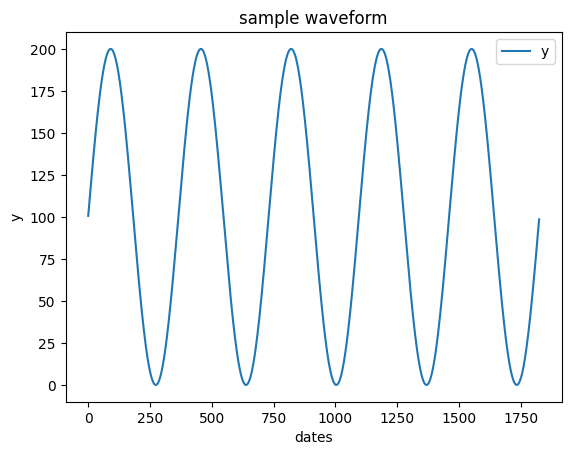

In [3]:
def plot_waveform(df: pd.DataFrame, *args):
    df.plot()
    if len(args) >= 3:
        plt.title(args[0])
        plt.xlabel(args[1])
        plt.ylabel(args[2])
    elif len(args) == 2:
        plt.xlabel(args[0])
        plt.ylabel(args[1])
    elif len(args) == 1:
        plt.title(args[0])
    else:
        return

plot_waveform(test_df, "sample waveform", "dates", "y")

In [4]:
# Since we don't know what parameters to play with, let's just use the defaults
model = prophet.Prophet()
model.fit(test_df)

# Generate a dataframe with the next 365 days
future = model.make_future_dataframe(periods=365)

# Predict the values for the next 365 days
forecast = model.predict(future)
forecast.tail()

19:49:37 - cmdstanpy - INFO - Chain [1] start processing
19:49:38 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2186,2023-12-27,100.020879,90.985465,91.491413,99.758137,100.262872,-8.773975,-8.773975,-8.773975,-0.000041,-0.000041,-0.000041,-8.773934,-8.773934,-8.773934,0.0,0.0,0.0,91.246904
2187,2023-12-28,100.020918,92.695931,93.203088,99.757197,100.263808,-7.059288,-7.059288,-7.059288,-0.000171,-0.000171,-0.000171,-7.059117,-7.059117,-7.059117,0.0,0.0,0.0,92.961630
2188,2023-12-29,100.020956,94.410955,94.925854,99.756424,100.264744,-5.342357,-5.342357,-5.342357,-0.000149,-0.000149,-0.000149,-5.342208,-5.342208,-5.342208,0.0,0.0,0.0,94.678599
2189,2023-12-30,100.020995,96.130076,96.645850,99.754584,100.265897,-3.623499,-3.623499,-3.623499,0.000219,0.000219,0.000219,-3.623717,-3.623717,-3.623717,0.0,0.0,0.0,96.397497
2190,2023-12-31,100.021034,97.845701,98.362521,99.753307,100.267504,-1.903974,-1.903974,-1.903974,0.000178,0.000178,0.000178,-1.904152,-1.904152,-1.904152,0.0,0.0,0.0,98.117060


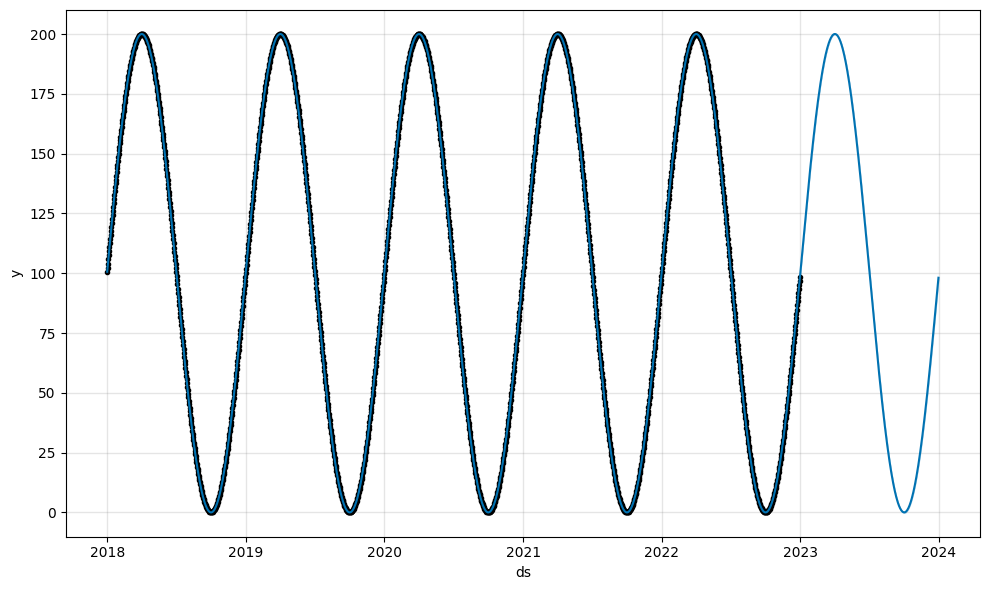

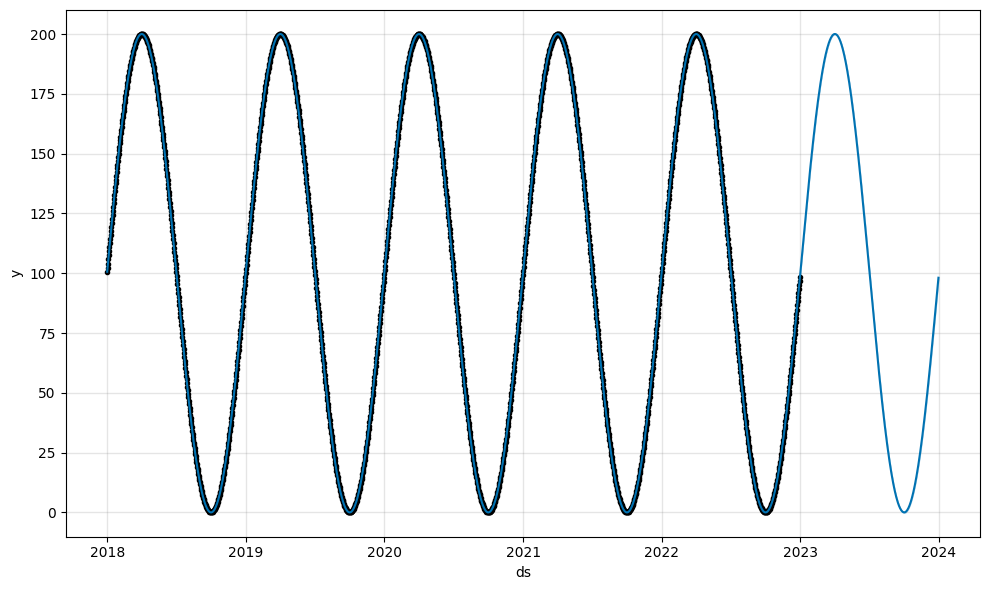

In [5]:
# Finally plot the forecast
model.plot(forecast)

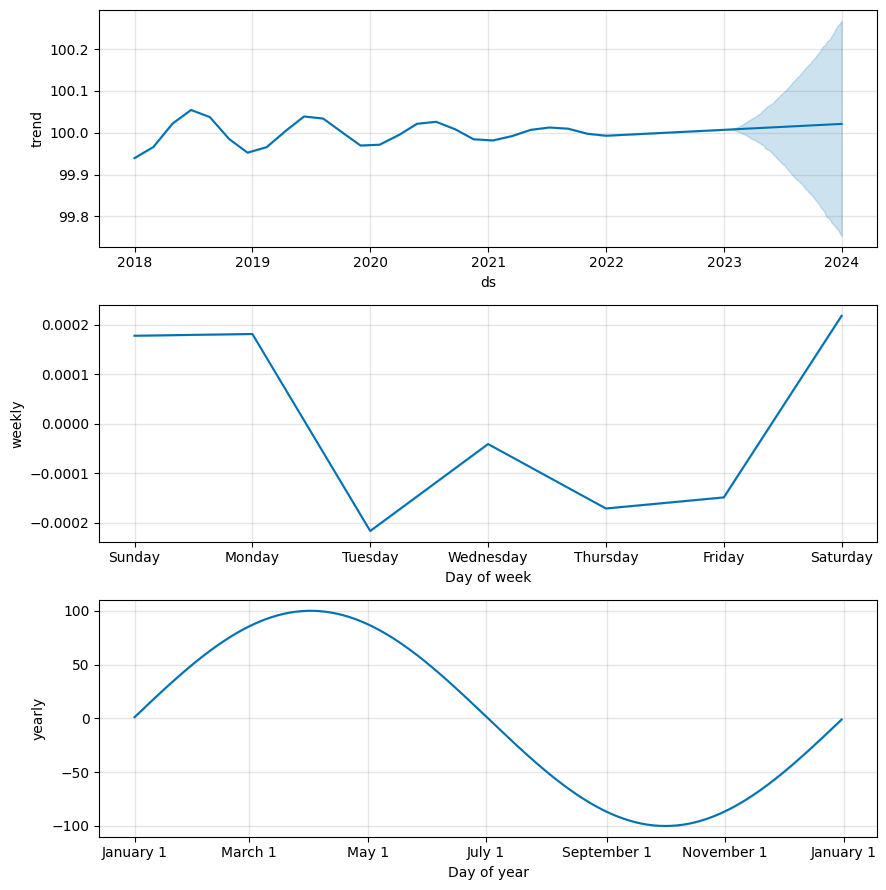

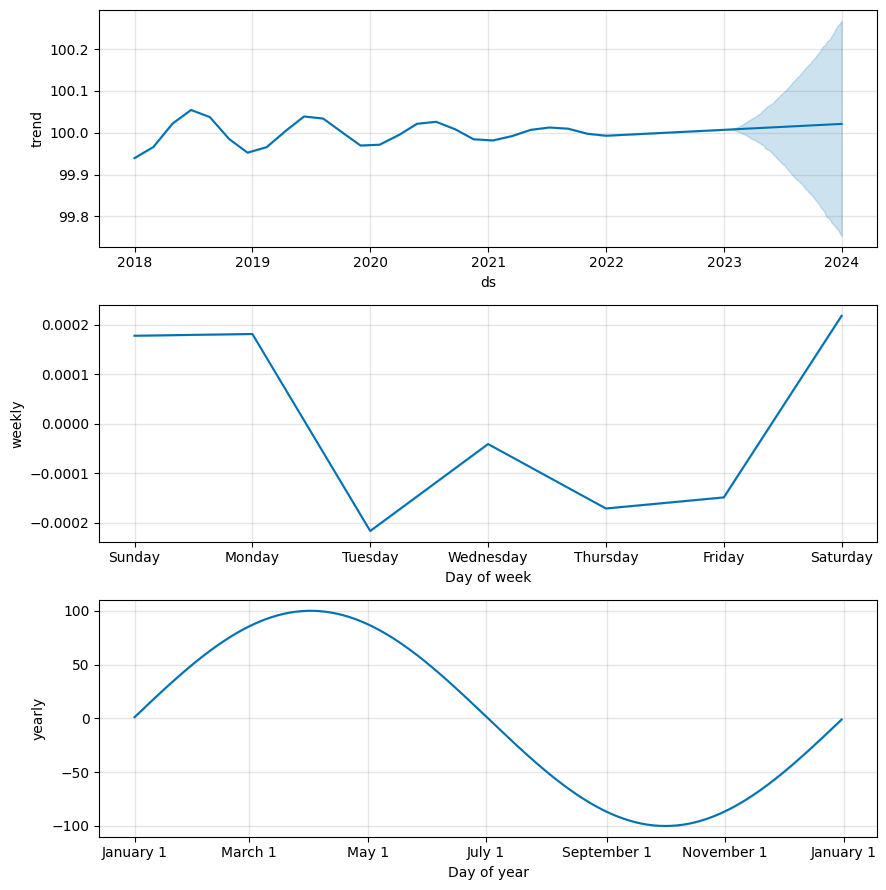

In [6]:
# Plot the components of the forecast
model.plot_components(forecast)